In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [7]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights

In [8]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 120 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
4/4 [==============================] - 64s 16s/step - loss: 3.5521 - accuracy: 0.5167 - val_loss: 4.0622 - val_accuracy: 0.6167
Epoch 2/20
4/4 [==============================] - 60s 15s/step - loss: 2.6534 - accuracy: 0.6250 - val_loss: 0.8628 - val_accuracy: 0.8333
Epoch 3/20
4/4 [==============================] - 59s 15s/step - loss: 1.1564 - accuracy: 0.7917 - val_loss: 0.5973 - val_accuracy: 0.8750
Epoch 4/20
4/4 [==============================] - 64s 16s/step - loss: 1.1738 - accuracy: 0.7667 - val_loss: 0.8404 - val_accuracy: 0.8083
Epoch 5/20
4/4 [==============================] - 54s 14s/step - loss: 0.3572 - accuracy: 0.8583 - val_loss: 0.2422 - val_accuracy: 0.9083
Epoch 6/20
4/4 [==============================] - 58s 14s/step - loss: 0.2430 - accuracy: 0.9250 - val_loss: 0.3486 - val_accuracy: 0.9083
Epoch 7/20
4/4 [==============================] - 66s 16s/step - loss: 0.4035 - accuracy: 

In [18]:
import matplotlib.pyplot as plt

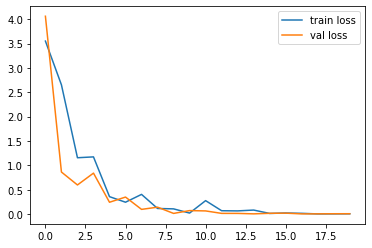

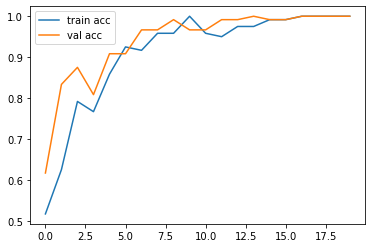

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:

from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [21]:
y_pred = model.predict(test_set)


In [22]:
y_pred

array([[1.00000000e+00, 1.75669523e-08],
       [7.22260042e-22, 1.00000000e+00],
       [1.23957230e-04, 9.99876022e-01],
       [7.26680383e-11, 1.00000000e+00],
       [9.99996543e-01, 3.49702395e-06],
       [9.99999642e-01, 4.00246478e-07],
       [9.99983430e-01, 1.65753718e-05],
       [4.56437590e-19, 1.00000000e+00],
       [9.99873757e-01, 1.26234809e-04],
       [1.27193108e-29, 1.00000000e+00],
       [1.40904917e-29, 1.00000000e+00],
       [1.70601562e-15, 1.00000000e+00],
       [9.99999881e-01, 1.06812493e-07],
       [1.00000000e+00, 2.98327030e-10],
       [1.00000000e+00, 5.17432451e-12],
       [1.00000000e+00, 1.43172807e-09],
       [9.98394668e-01, 1.60527322e-03],
       [9.99983430e-01, 1.65599977e-05],
       [9.99449313e-01, 5.50694007e-04],
       [1.92942628e-15, 1.00000000e+00],
       [2.98218955e-25, 1.00000000e+00],
       [2.06938924e-14, 1.00000000e+00],
       [4.95855745e-10, 1.00000000e+00],
       [2.79735610e-12, 1.00000000e+00],
       [1.000000

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [24]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet152V2.h5')

In [28]:
img=image.load_img('Datasets/test/real/00503005.png',target_size=(224,224))

In [29]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[1.9419429e-04, 9.9980587e-01]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a

array([1], dtype=int64)